# Mobile Price Classification

#### Aquest Notebook presenta el preprocessing que s'ha fet en el dataset de Mobile Price Classification. També hem afegit petites explicacions sobre el nostre projecte.

Fem imports:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Veiem com es el dataset:

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Mirem si tenim NaNs al 'dataset':

In [3]:
nan_count = df.isnull().sum()
nan_percentage = df.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Porcentaje de NaNs por columna:
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


Mirem quin tipus de dades estem tractant i a més observem en una gràfica el balanceig del nombre de dades:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

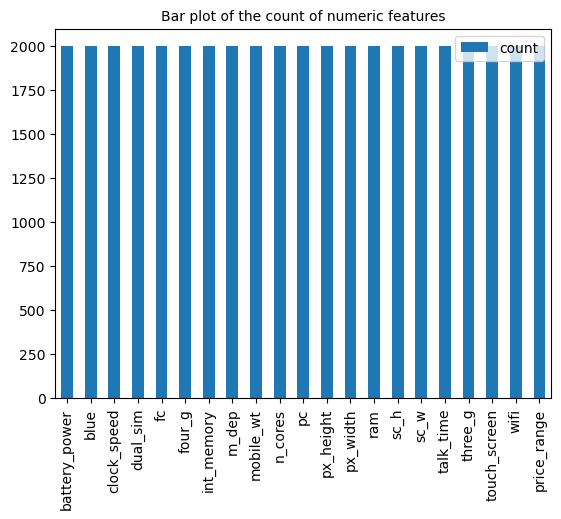

In [4]:
t=df.info()
d = df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=10)

Discretitzem les següents classes:

In [5]:
def discretize(df, columns):
    for column in columns:
        df[column] = pd.qcut(df[column], q=4, labels=False)
    return df

discretize(df, ['battery_power', 'clock_speed', 'fc', 'ram', 'talk_time', 'int_memory', 'm_dep', 'mobile_wt',
                    'pc', 'px_height', 'px_width', 'sc_h', 'sc_w'])

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,2,0,0,0,0,2,3,2,...,0,0,2,0,2,3,0,0,1,1
1,1,1,0,1,0,1,3,2,1,3,...,2,3,2,3,1,1,1,1,0,2
2,0,1,0,1,1,1,2,3,2,5,...,3,3,2,1,0,1,1,1,0,2
3,0,1,3,0,0,0,0,2,1,6,...,3,3,2,2,2,1,1,0,0,2
4,3,1,1,0,3,1,2,2,1,2,...,3,1,1,0,0,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,1,0,1,0,2,0,6,...,3,3,0,2,1,3,1,1,0,0
1996,3,1,3,1,0,0,2,0,3,4,...,2,3,1,1,3,2,1,1,1,2
1997,3,0,1,1,0,1,2,2,0,8,...,2,2,2,0,0,0,1,1,0,3
1998,2,0,1,0,2,1,2,0,2,5,...,1,0,0,3,3,3,1,1,1,0


Mirem si estan balancejades per escollir la mètrica més adient:

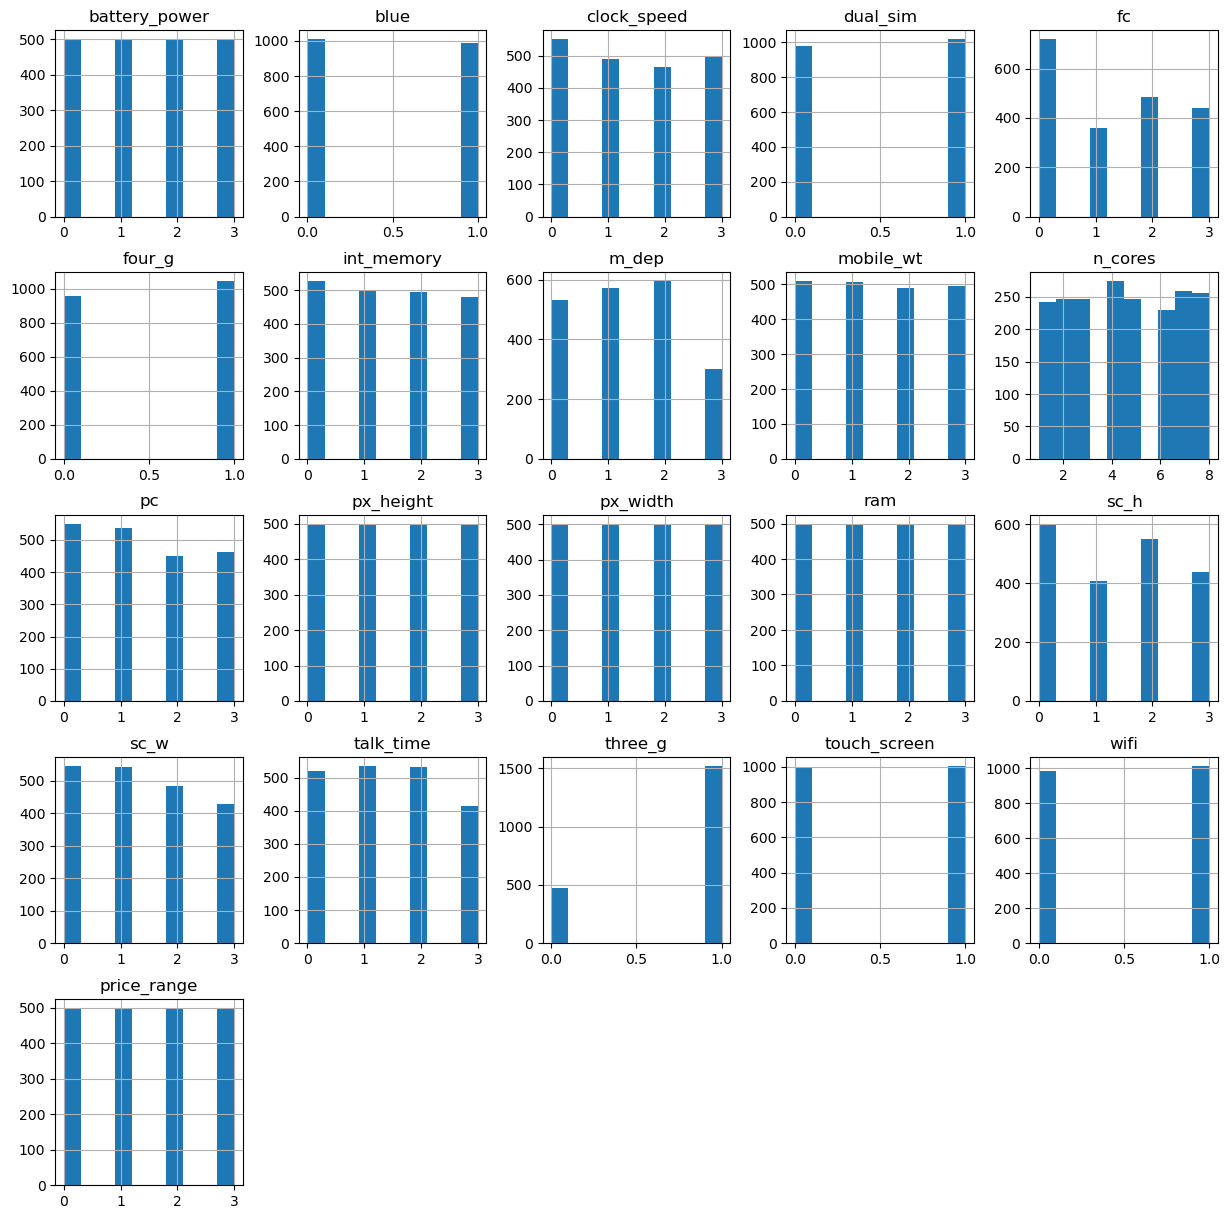

In [6]:
df.hist(figsize=(15,15))
plt.show()

##### Aclaracions sobre el nostre codi fet al document DecisionTreeClassifier.py